# Análisis exploratorio de datos - Baubap AI Challenge 2023 
## Por: Rafael Sánchez Cedillo, Francisco Valerio López

### Neural networks challenge

El objetivo consiste en predecir con la mayor precisión la variable objetivo. 
El primer paso entonces sería conocer cuál es la variable objetivo y cuáles son las variables que tienen mayor importancia para generar el modelo de regresión.

In [1]:
#pip install optuna

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

### Importación y análisis exploratorio de datos

Ideas:

- Utilizar `head()`, `describe()` e `info()`
- Visualizar la distribución de la variable objetivo y de las otras características
- Identificar NaNs y buscar outliers

In [3]:
datos = pd.read_pickle("Data/nn_challenge_train.pkl")

In [4]:
datos.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.554222        1.0        0.0   0.000000   0.398189   0.000000   
1   0.521013        0.5        0.0        NaN   0.299222   0.000649   
2   0.545612        1.0        0.0   0.000102   0.248790   0.000000   
3   0.593774        0.5        0.0   0.000000   0.412052   0.001299   
4   0.278900        0.0        0.0   0.000000   0.160199   0.009740   

   feature_7  feature_8  feature_9  feature_10  ...  feature_210  feature_211  \
0   0.190514   0.774141   0.004995    0.666667  ...     0.000000     0.000000   
1   0.000000   0.827157   0.000668    0.000000  ...     0.000000     0.000000   
2   0.571429   0.851531   0.000604    0.000000  ...     0.206293     0.022686   
3   0.087886   0.559571   0.002227    0.333333  ...     0.026009     0.074658   
4   0.134400   0.841197   0.000700    0.833333  ...     0.049540     0.064444   

   feature_212  feature_213  feature_214  feature_215 feature_216  \
0     0.000000      0.00000     0.000000     0.000000    0.000000   
1     0.000000      0.00000     0.000000     0.000000    0.000000   
2     0.000562      0.50000     0.116689     0.566809    0.020597   
3     0.003375      1.00000     0.025595     0.097360    0.020597   
4     0.003375      0.85715     0.032973     0.131737    0.020597   

   feature_217  feature_218  target  
0     0.000000          1.0       1  
1     0.000000          1.0       1  
2     0.020891          1.0       1  
3     0.002580          0.0       1  
4     0.002613          1.0       1  

[5 rows x 219 columns]

In [5]:
datos.shape

(472422, 219)

In [6]:
datos.describe()

feature_1      feature_2      feature_3      feature_4  \
count  472422.000000  472420.000000  471254.000000  435576.000000   
mean        0.518669       0.544020       0.004611       0.000691   
std         0.108863       0.324083       0.018434       0.010233   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.445342       0.500000       0.000000       0.000000   
50%         0.518781       0.500000       0.000000       0.000051   
75%         0.592213       1.000000       0.000000       0.000147   
max         1.000000       1.000000       1.000000       1.000000   

           feature_5      feature_6      feature_7      feature_8  \
count  472422.000000  471256.000000  472422.000000  472422.000000   
mean        0.312839       0.015258       0.249711       0.727841   
std         0.112954       0.025510       0.145240       0.110845   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.227816       0.001948       0.152343       0.662139   
50%         0.293266       0.006494       0.228571       0.747226   
75%         0.379608       0.018182       0.326514       0.811302   
max         1.000000       1.000000       1.000000       1.000000   

           feature_9     feature_10  ...    feature_210    feature_211  \
count  471256.000000  449700.000000  ...  472420.000000  472420.000000   
mean        0.001884       0.513358  ...       0.080568       0.091190   
std         0.006095       0.318793  ...       0.089586       0.115406   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000732       0.333333  ...       0.023898       0.020597   
50%         0.001145       0.500000  ...       0.058742       0.049828   
75%         0.001909       0.750000  ...       0.110885       0.123073   
max         1.000000       1.000000  ...       1.000000       1.000000   

         feature_212    feature_213    feature_214    feature_215  \
count  472420.000000  472420.000000  472420.000000  472420.000000   
mean        0.003238       0.584832       0.040472       0.154438   
std         0.009128       0.358869       0.043787       0.123564   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000562       0.500000       0.024305       0.093145   
50%         0.001687       0.727250       0.035991       0.143492   
75%         0.003937       0.852950       0.051146       0.225993   
max         1.000000       1.000000       1.000000       1.000000   

         feature_216    feature_217    feature_218         target  
count  472420.000000  472420.000000  471255.000000  472422.000000  
mean        0.057250       0.004895       0.653336       0.859308  
std         0.103643       0.016048       0.475908       0.347704  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.020597       0.001184       0.000000       1.000000  
50%         0.020597       0.002420       1.000000       1.000000  
75%         0.037407       0.004468       1.000000       1.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 208 columns]

In [38]:
datos.dtypes.value_counts()

float32     197
float64      10
category      1
category      1
category      1
category      1
category      1
category      1
category      1
object        1
category      1
category      1
category      1
int32         1
dtype: int64

In [43]:
columnas_raras = datos.select_dtypes(include = ['object', 'category']).columns

print(columnas_raras)

Index(['feature_17', 'feature_87', 'feature_118', 'feature_119', 'feature_139',
       'feature_144', 'feature_147', 'feature_148', 'feature_158',
       'feature_159', 'feature_195'],
      dtype='object')


In [46]:
datos['feature_17'].unique()

['(!q4.0800.54', '!!l3.0370.36', 'H!k2.0340.45', '!!j2.0270.36', 'F!p3.0830.72', '*!s4.5900.54', NaN, 'J/m2.0580.63', '!!k3.0280.27', 'BBy4.52141.18']
Categories (9, object): ['!!j2.0270.36', '!!l3.0370.36', 'F!p3.0830.72', '!!k3.0280.27', ..., '(!q4.0800.54', '*!s4.5900.54', 'J/m2.0580.63', 'BBy4.52141.18']

In [47]:
datos['feature_87'].unique()

['[!q2.51140.71', 'Ybs3.51260.71', '[!p3.0990.64', '\!p2.5950.64', NaN, 'eet4.51410.71']
Categories (5, object): ['[!p3.0990.64', 'eet4.51410.71', '[!q2.51140.71', 'Ybs3.51260.71', '\!p2.5950.64']

In [49]:
datos['feature_148'].unique()

array(['Link_Ned_Leia', 'Mario_Ned_Leia', 'Link_Arya_Leia',
       'CrashBandicoot_Arya_Leia', 'Joel_Arya_Leia', 'Kratos_Ned_Leia',
       'MasterChief_Jon', 'Link_Daenerys', 'Kratos_Daenerys',
       'MasterChief_Ned_Leia', 'CrashBandicoot_Ned_Leia',
       'Kratos_Arya_Leia', 'CrashBandicoot_Jon',
       'Mario_Cersei_Han_Aragorn', 'Mario_Jon', 'Kratos_Jon', 'Geralt',
       'Joel_Ned_Leia', 'Link_Cersei_Han_Aragorn',
       'MasterChief_Arya_Leia', 'Mario_Arya_Leia', 'Link_Tyrion',
       'Mario_Daenerys', 'Joel_Cersei_Han_Aragorn', 'Link_Jon',
       'Kratos_Tyrion', 'Kratos_Cersei_Han_Aragorn',
       'Joel_Cersei_Luke_Aragorn', 'CrashBandicoot_Daenerys',
       'Joel_Tyrion', 'Joel_Jon', 'CrashBandicoot_Tyrion',
       'CrashBandicoot_Cersei_Luke_Aragorn', 'MasterChief_Daenerys',
       'Joel_Daenerys', 'CrashBandicoot_Cersei_Yoda_Frodo',
       'CrashBandicoot_Cersei_Han_Aragorn', 'Link_Cersei_Yoda_Frodo',
       'MasterChief_Cersei_Luke_Aragorn', 'MasterChief_Tyrion',
       'M

Parece que no tienen ninguna importancia ni sentido con el resto del dataset. Intentaremos eliminarlas.

In [50]:
datos_copy = datos.copy()

In [51]:
columns_drop = datos_copy.select_dtypes(include = ['category', 'object']).columns

datos_copy.drop(columns = columns_drop, inplace = True)

In [57]:
datos_copy.isnull().sum()

feature_1          0
feature_2          2
feature_3       1168
feature_4      36846
feature_5          0
               ...  
feature_215        2
feature_216        2
feature_217        2
feature_218     1167
target             0
Length: 208, dtype: int64

Buscamos las columnas que únicamente tengan valores NaN

In [58]:
nans = datos_copy.columns[datos_copy.isnull().any()]

In [59]:
nans

Index(['feature_2', 'feature_3', 'feature_4', 'feature_6', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_15', 'feature_16',
       ...
       'feature_209', 'feature_210', 'feature_211', 'feature_212',
       'feature_213', 'feature_214', 'feature_215', 'feature_216',
       'feature_217', 'feature_218'],
      dtype='object', length=174)

Como existen muchos valores NaN no sería conveniente eliminarlas. Una de las técnicas comunes es reemplazarlos con alguna medida de tendencia central. Para datos numéricos suele utilizarse la media o la mediana.

In [60]:
for col in nans:

    datos_copy[col].fillna(datos_copy[col].mean(), inplace = True)

In [64]:
datos_copy.isnull().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_215    0
feature_216    0
feature_217    0
feature_218    0
target         0
Length: 208, dtype: int64

### Visualización de datos

<Axes: xlabel='feature_1', ylabel='Count'>

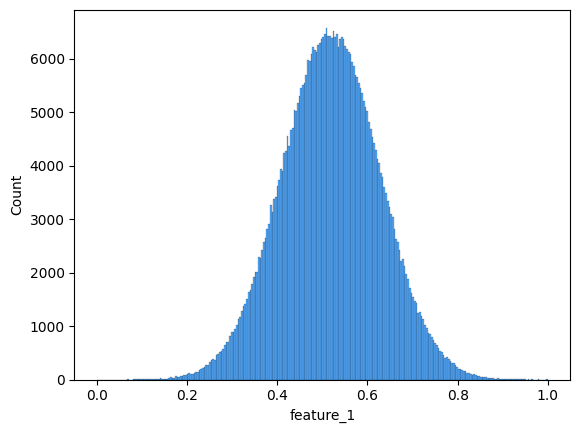

In [13]:
sns.histplot(datos.feature_1, color = 'dodgerblue')

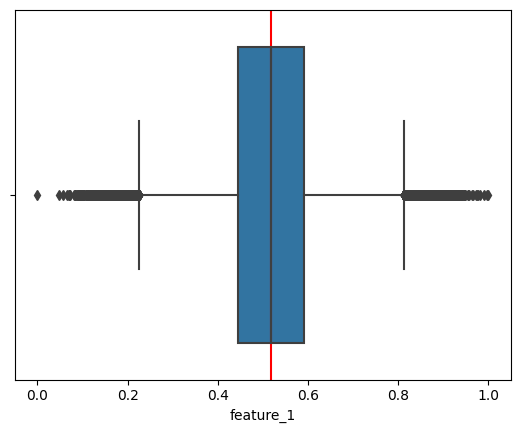

In [16]:
sns.boxplot(x = datos.feature_1)
plt.axvline(datos.feature_1.mean(), color = 'red')

<Axes: xlabel='target', ylabel='Count'>

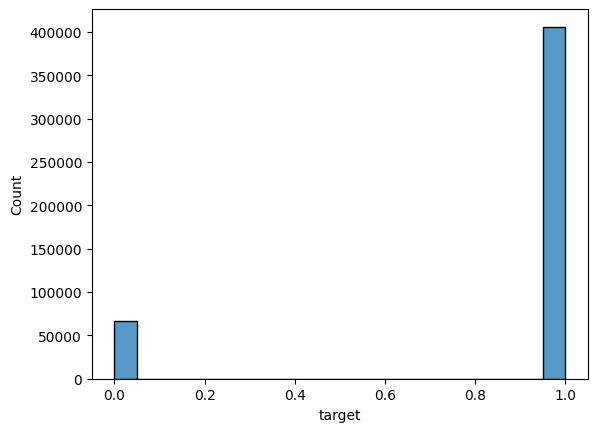

In [7]:
sns.histplot(datos.target)

### Reducción de dimensionalidad

C:\Users\franz\AppData\Local\Temp\ipykernel_9144\3185635920.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datos.corr())


<Axes: >

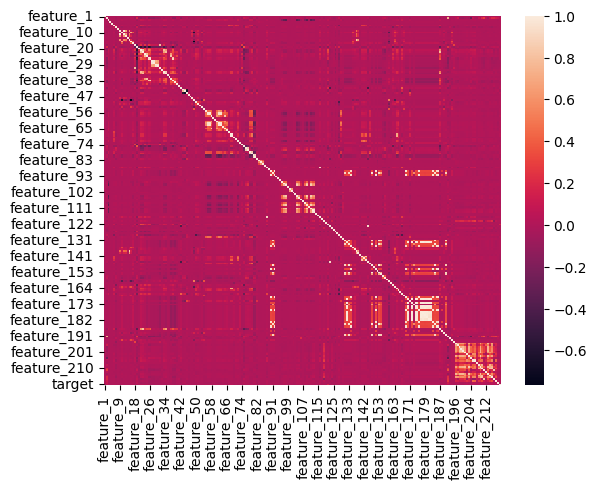

In [10]:
sns.heatmap(datos.corr())

El heatmap no es una buena opción ya que no es posible identificar con claridad las variables más correlacionadas, intentemos utilizar la matriz de correlación y alguna manera de verificar las variables más correlacionadas

In [17]:
correlation_matrix = datos.corr()

C:\Users\franz\AppData\Local\Temp\ipykernel_9144\3034317635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos.corr()


In [32]:
a = 0.90 # umbral de correlación

variables_altamente_corr = []

for i in range(len(correlation_matrix.columns)):

    for j in range(i+1, len(correlation_matrix.columns)):

        if abs(correlation_matrix.iloc[i, j]) >= a:

            variables_altamente_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

In [33]:
variables_altamente_corr

[('feature_9', 'feature_11', 0.9894294346480259),
 ('feature_25', 'feature_26', 0.93477691350158),
 ('feature_26', 'feature_38', 0.9060894465076966),
 ('feature_27', 'feature_28', 0.9518331726489452),
 ('feature_29', 'feature_30', 0.9492845672021534),
 ('feature_56', 'feature_57', 0.9891401071742755),
 ('feature_56', 'feature_62', 0.9335667360873925),
 ('feature_56', 'feature_63', 0.941692527571001),
 ('feature_57', 'feature_62', 0.9393524151586533),
 ('feature_57', 'feature_63', 0.9597020027624982),
 ('feature_62', 'feature_63', 0.9707380873342751),
 ('feature_68', 'feature_69', 0.9945113160056333),
 ('feature_80', 'feature_81', 0.9060304299552759),
 ('feature_88', 'feature_116', 0.9152214803709946),
 ('feature_90', 'feature_92', 0.9841018270598335),
 ('feature_90', 'feature_134', 0.9162267477781827),
 ('feature_90', 'feature_151', 0.9857286426547821),
 ('feature_90', 'feature_169', 0.9797443843297668),
 ('feature_90', 'feature_176', 0.9761639218729709),
 ('feature_90', 'feature_183',

In [34]:
print(len(variables_altamente_corr))

124


### Análisis de componentes principales (PCA)

In [52]:
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [65]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos_copy)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Optimizar en cada fase hasta 4 parámetros:

Phase 1: Learning
Phase 2: Complexity
Phase 3: Regularization
Phase 4: Universal

óptimización de búsqueda bayesiana